*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, some DL optimizers are implemented

First, some libraries are imported.

In [332]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### **Previous steps:**

Let's continue with some required 1D functions:

In [333]:
# Single-Variable Derivatives
def deriv(f, x, delta):
    # Center Difference Derivative
    y = (f(x + delta) - f(x - delta)) / (2*delta)
    return y

def Second_Deriv(f, x, delta):
    y = (f(x + delta) -2*f(x) + f(x - delta)) / delta**2
    return y

# Newton search for 1D

def Newton_Search(f, current, delta_deriv, epsilon_stop, max_iters=1E+3):
    # Initialization (do While)
    Continue = True
    x = current
    k = 1
    while Continue:
        # First derivative
        deriv_current = deriv(f, x, delta_deriv)

        # Second derivative
        deriv2nd_current = Second_Deriv(f, x, delta_deriv)

        # If the second derivative is zero, break loop
        if(deriv2nd_current == 0):
            print("2nd Derivative Equal to Zero in Newton Search")
            x_next = x
            break

        # Next iteration value
        x_next = x - deriv_current / (deriv2nd_current)

        # Finish flag
        Continue = (abs(x_next - x) > epsilon_stop) and (abs(deriv_current) > epsilon_stop)
        Continue = Continue and k <= max_iters

        # Update value
        x = x_next
        
        # Increase iterations counter
        k += 1
    return x_next, k

# Multi dimensional to 1-D
def gen_f_1d(f, xi, d):
    def f_1d(l):
        return f(xi + l*d)
    return f_1d


And their analog for multiple variable functions

In [334]:
# Multiple - Variable Derivatives

def Partial_deriv(f, x, index, delta):
    # Derivative usign centered difference equation
    x_deltaP = x.copy()
    x_deltaN = x.copy()

    # Increase/Decrease in the required coordinate
    x_deltaP[index] += delta
    x_deltaN[index] -= delta
    return (f(x_deltaP) - f(x_deltaN)) / (2*delta)

def Partial_2nd_Deriv(f, x, index, delta):
    x_delta_a  = x.copy()
    x_delta_b  = x.copy()
    x_delta_ab = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta_a[index[0]]  += delta
    x_delta_b[index[1]]  += delta
    x_delta_ab[index[0]] += delta
    x_delta_ab[index[1]] += delta

    return (f(x_delta_ab) - f(x_delta_b) - f(x_delta_a) + f(x)) / (delta ** 2)

def Gradient(f, x, delta):
    grad = x.copy()
    for i in range(len(x)):
        grad[i] = Partial_deriv(f, x, i, delta)
    return grad

### **Algorithms**

#### *i) Gradient Descend with line search*

In [335]:
def GraDesc(f, x_ini, delta_deriv, epsilon_stop, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    # Line-Search related iterations
    k_LS = 0
    
    # History of each iterations
    history = [x.copy()]
    
    print('\n >> Gradient Descend (Bazaara) <<')
    while True:
        # Increase iterations counter
        k += 1
        
        # Direction is given by the reflected gradient
        Dir = (-1) * Gradient(f, x, delta_deriv)

        # Define a new function for the i-th direction
        f_1d = gen_f_1d(f, x, Dir)
        
        # Optimize the function on this direction
        l_opt , delta_k_LS = Newton_Search(f_1d, 0, delta_deriv, epsilon_stop)
        k_LS += delta_k_LS

        # Update next "x" value
        x_next = x + l_opt*Dir

        # Save each update
        history.append(x_next.copy())
        
        # Stop criteria
        if(np.linalg.norm(Dir) < epsilon_stop or k >= max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(Dir)}')
            break

        # Update x value
        x = x_next

    print(f'Final Value = {x_next} \nIterations = {k}')
    print(f'Total line search iterations = {k_LS}')
    return x_next, history

#### *ii) Gradient Descend with learning rate*

In [336]:
def GraDeLR(f, x_ini, delta_deriv, epsilon_stop, l_rate=0.001, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    
    # History of each iterations
    history = [x.copy()]
    
    print('\n >> Gradient Descend w/o line search <<')
    while True:
        # Increase iterations counter
        k += 1

        # Direction is given by the reflected gradient
        grad_x = Gradient(f, x, delta_deriv)

        # Calculate the step (delta_x)
        delta_x = - grad_x * l_rate 

        # Update next "x" value
        x_next = x + delta_x

        # Save each update
        history.append(x_next.copy())
        
        # Stop criteria
        if(np.linalg.norm(grad_x) < epsilon_stop or k >= max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(grad_x)}')
            break

        # Update x value
        x = x_next
        
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

#### *iii) ADAptative GRAdient (AdaGrad)*

In [ ]:
def AdaGrad(f, x_ini, delta_deriv, epsilon_stop, l_rate=0.001, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    
    # History of each iteration
    history = [x.copy()]
    
    # Squared Accumulated Gradient (r)
    r = np.zeros_like(x)

    print('\n >> AdaGrad Optimization <<')
    while True:
        # Increase iterations counter
        k += 1

        # Calculate the gradient at the current point
        grad_x = Gradient(f, x, delta_deriv)

        # Update the accumulated gradient (r)
        r += grad_x**2

        # Calculate the adaptive step (delta_x)
        delta_x = - grad_x * l_rate / (np.sqrt(r) + delta_deriv)

        # Update x to the next value
        x_next = x + delta_x

        # Save each update in history
        history.append(x_next.copy())
        
        # Stop criteria
        if (np.linalg.norm(grad_x) < epsilon_stop or k >= max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(grad_x)}')
            break

        # Update x value
        x = x_next

    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

### **_Testing_**

Function to optimize

In [338]:
def f_obj(x):
    # Rosenbrock function
    y = 100 * (x[0] - 1)**2 + (x[1] - x[0]**2)**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Absolute mininum evaluation: 0


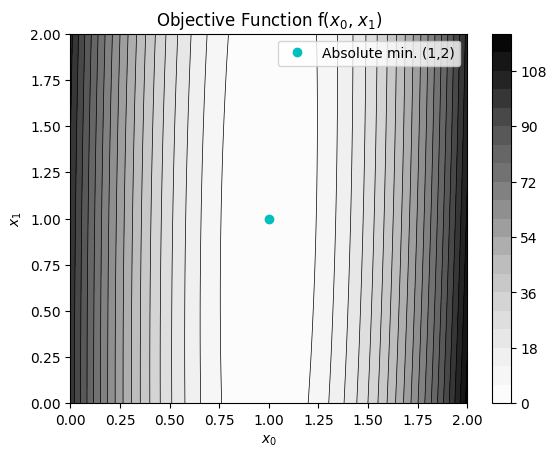

In [339]:
# Grid generation
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(1, 1, 'co', markersize=6, label='Absolute min. (1,2)')            

plt.legend()
plt.title('Objective Function f($x_0$, $x_1$)')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

print(f'Absolute mininum evaluation: { f_obj([1,1])}')

In [345]:
# Parameters for the algorithm
delta = 1E-3
epsilon = 1E-5
x_initial =  [0, 2]

# Run Optimization
x, GrDeLS_History = GraDesc(f_obj, x_initial, delta, epsilon)
x, GrDeLR_History = GraDeLR(f_obj, x_initial, delta, epsilon, 0.001)
x, AdaGra_History = AdaGrad(f_obj, x_initial, delta, epsilon, 1)


 >> Gradient Descend (Bazaara) <<
STOP: Gradient Norm = 9.138496543826084e-06
Final Value = [1.00000001 1.000004  ] 
Iterations = 28
Total line search iterations = 81

 >> Gradient Descend w/o line search <<
STOP: Gradient Norm = 9.991795092249766e-06
Final Value = [1.00000008 1.00000515] 
Iterations = 6317

 >> AdaGrad Optimization <<
STOP: Gradient Norm = 5.692942775549676e-06
Final Value = [1.00000001 1.00000078] 
Iterations = 10


Plot trayectories

Text(0, 0.5, '$x_2$')

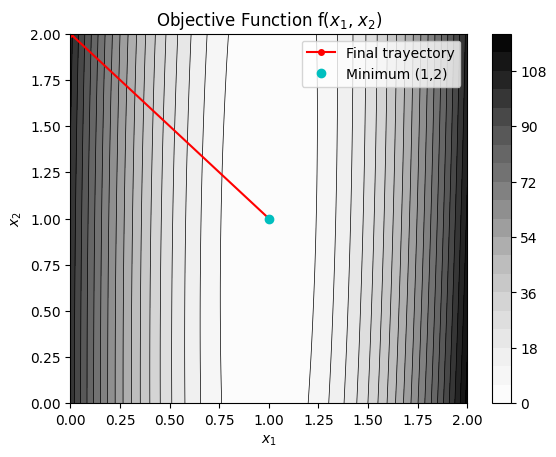

In [347]:
# Set History
#History_show = np.array(GrDeLS_History)
#History_show = np.array(GrDeLR_History)
History_show = np.array(AdaGra_History)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Plot History
plt.plot(History_show[:, 0], History_show[:, 1], 'ro-', markersize=4, 
         label="Final trayectory")

# Indicate minimum
plt.plot(1, 1, 'co', markersize=6, label='Minimum (1,2)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')